<a href="https://colab.research.google.com/github/ANNU12344/Machine-learning/blob/main/All_forecasting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

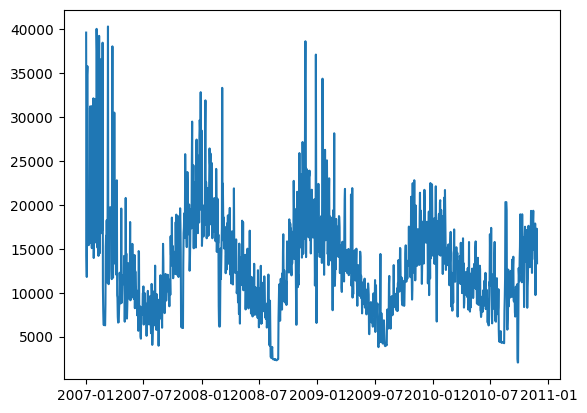

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load time series data
data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True)

# Visualize time series data
plt.plot(data)
plt.show()




In [ ]:
data.head()

,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333


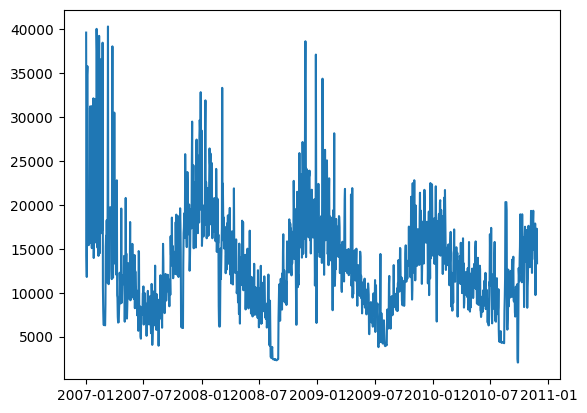

ADF Statistic: -3.122427
p-value: 0.024937
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
plt.plot(data)
plt.show()

# Test for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
data.shape

(1426, 1)

In [ ]:
diff_data = data.diff().dropna()

In [ ]:
diff_data.shape



(1425, 1)

In [ ]:
diff_data.shape

(1425, 1)

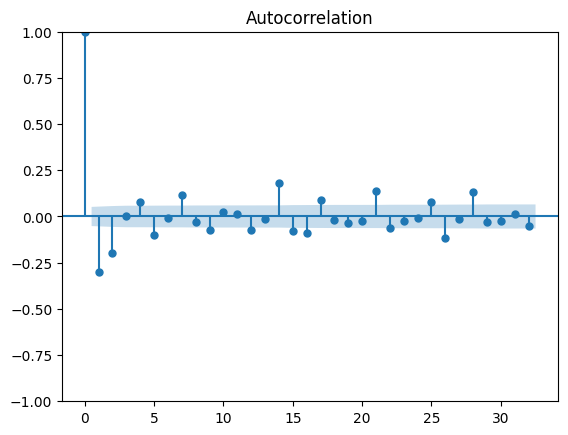

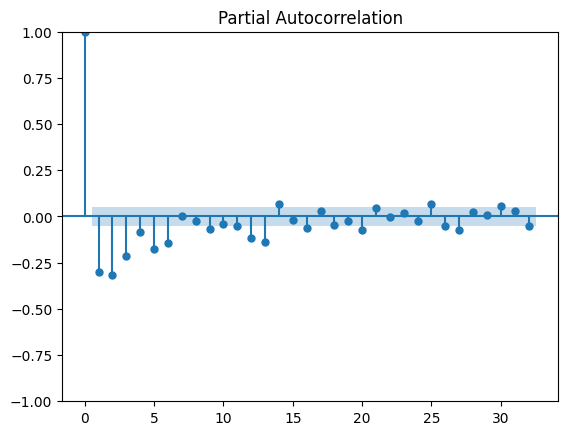

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_data)
plt.show()
plot_pacf(diff_data)
plt.show()

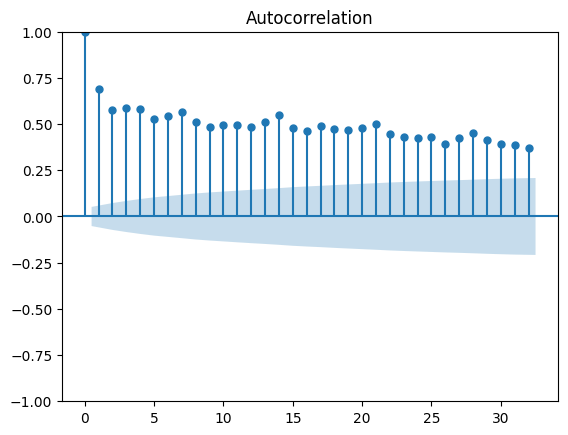

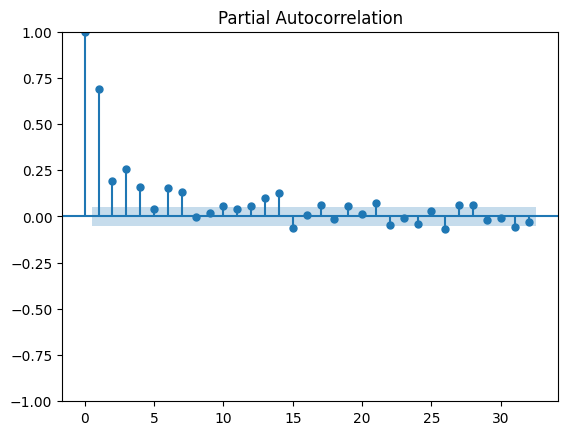

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()
plot_pacf(data)
plt.show()

In [ ]:
model = AutoReg(diff_data, lags=20) # replace 2 with appropriate order
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
X=diff_data['power_consumption']
train =X[:len(X)-365]
test=X[len(X)-365:]
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


In [ ]:
# Evaluate predictions using mean squared error
from math import sqrt
mse = sqrt(mean_squared_error(test, predictions))
print('MSE: %.3f' % mse)

MSE: 2861.761


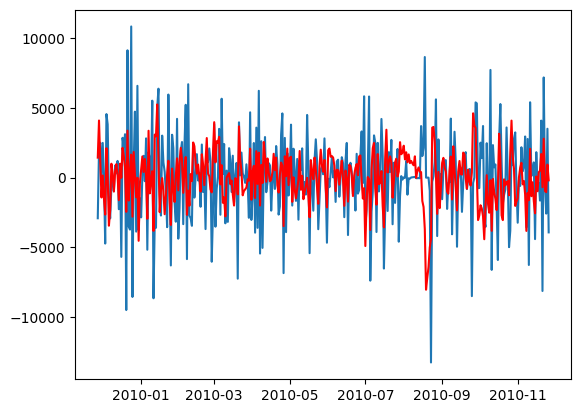

In [ ]:
# Plot predictions and actual values
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [ ]:
forecast = model_fit.predict(start=len(data), end=len(data)+365, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


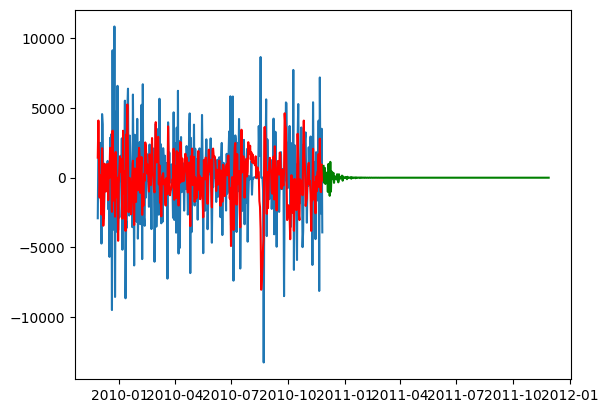

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(forecast,color='green')
plt.show()


In [ ]:
#Arima model for forecasting model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

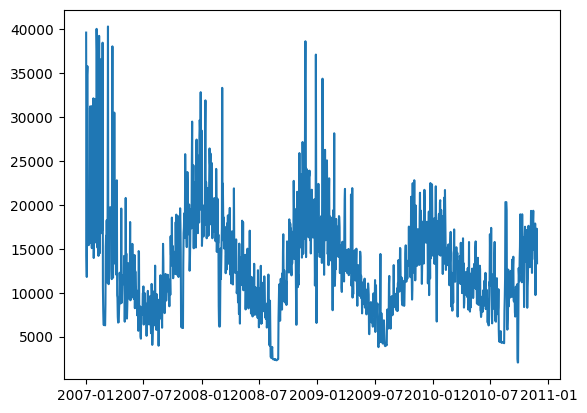

In [ ]:
data_power = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True)

# Visualize time series data
plt.plot(data_power)
plt.show()


In [ ]:
# Test for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.122427
p-value: 0.024937
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


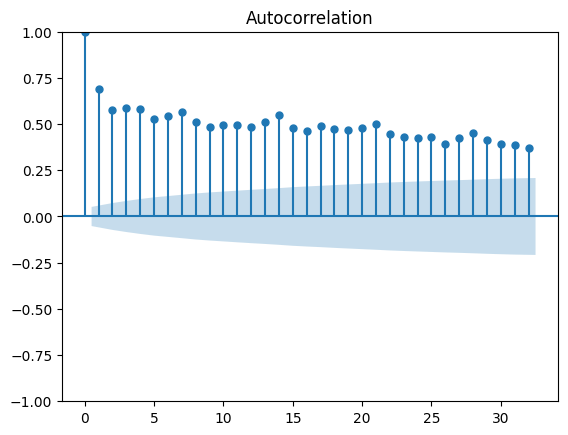

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


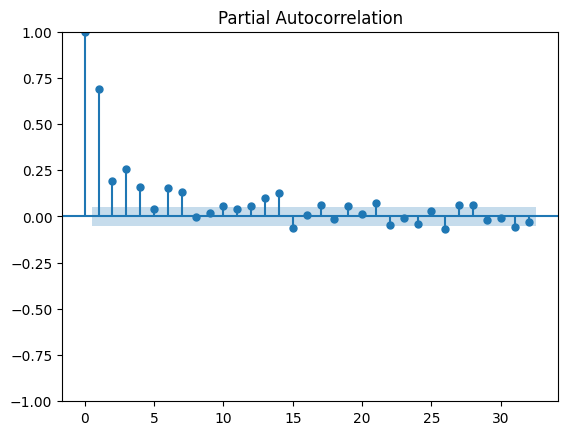

In [ ]:
if result[1] > 0.05:
    diff_data = data.diff().dropna()
else:
    diff_data = data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_data)
plt.show()
plot_pacf(diff_data)
plt.show()


SARIMA Model

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

<ipython-input-56-54c1557c1a2f>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [ ]:
data

Date
2007-01-01    39584.733333
2007-01-02    14243.933333
2007-01-03    11791.900000
2007-01-04    34779.533333
2007-01-05    35758.733333
                  ...     
2010-11-22    16924.600000
2010-11-23    16352.266667
2010-11-24    13769.466667
2010-11-25    17278.733333
2010-11-26    13347.733333
Name: power_consumption, Length: 1426, dtype: float64

In [ ]:
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)) # Example SARIMA model with order (1,1,1) and seasonal order (0,1,1,12)
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


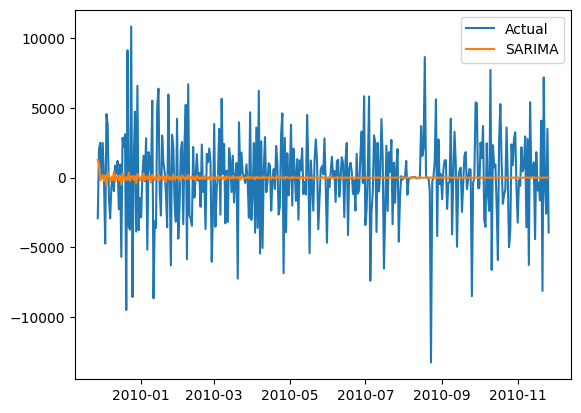

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Actual')
plt.plot(sarima_predictions, label='SARIMA')
plt.legend()
plt.show()

In [ ]:
# Evaluate predictions using mean squared error
from math import sqrt
rmse_sarima = sqrt(mean_squared_error(test,sarima_predictions))
print('MSE: %.3f' % rmse_sarima )

MSE: 3139.455


In [ ]:
!pip install pmdarima
import pmdarima as pm



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = pm.auto_arima(train_data, seasonal=True, m=12, trace=True,
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=20595.826, Time=16.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=20977.020, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=20854.198, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=20648.291, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=20975.042, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=20596.109, Time=3.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=20596.441, Time=3.59 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=20596.469, Time=17.60 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=20596.468, Time=16.55 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=20603.653, Time=0.89 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=20594.471, Time=10.82 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=20592.687, Time=4.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=20594.223, Time=2.65 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=20594.686, Time=8.69 sec
 

In [ ]:
print(model.order)
print(model.seasonal_order)

(0, 1, 2)
(0, 0, 2, 12)


In [ ]:
X2=data
train_data =X2[:len(X)-365]
test_data=X2[len(X)-365:]

In [ ]:
test_data

Date
2009-11-26    13922.433333
2009-11-27    11005.433333
2009-11-28    13047.500000
2009-11-29    15554.033333
2009-11-30    15606.500000
                  ...     
2010-11-22    16924.600000
2010-11-23    16352.266667
2010-11-24    13769.466667
2010-11-25    17278.733333
2010-11-26    13347.733333
Name: power_consumption, Length: 366, dtype: float64

In [ ]:
sarima_model2 = SARIMAX(train, order=(0,1,2), seasonal_order=(0, 0, 2, 12)) # Example SARIMA model with order (1,1,1) and seasonal order (0,1,1,12)
sarima_model_fit2 = sarima_model2.fit()
sarima_predictions1 = sarima_model_fit2.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Evaluate predictions using mean squared error
from math import sqrt
rmse_sarima1 = sqrt(mean_squared_error(test_data,sarima_predictions1))
print('MSE: %.3f' % rmse_sarima1 )

MSE: 13072.268


In [ ]:
sarima_predictions1.shape

(366,)

In [ ]:
sarima_predictions1

2009-11-27    2120.589930
2009-11-28     615.096653
2009-11-29    -377.593684
2009-11-30      80.674758
2009-12-01     266.795026
                 ...     
2010-11-23     -10.498192
2010-11-24     -10.498192
2010-11-25     -10.498192
2010-11-26     -10.498192
2010-11-27     -10.498192
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [ ]:
X2=X2.diff().dropna()
train_data =X2[:len(X)-365]
test_data=X2[len(X)-365:]
test_data.shape

(364,)

In [ ]:
test_data = test_data.diff().dropna()
test_data

Date
2009-11-30     1576.066667
2009-12-01     7811.600000
2009-12-02    -9873.033333
2009-12-03     2836.433333
2009-12-04    16125.133333
                  ...     
2010-11-22    45536.066667
2010-11-23   -50661.866667
2010-11-24    28853.100000
2010-11-25     2347.233333
2010-11-26   -21634.866667
Name: power_consumption, Length: 362, dtype: float64

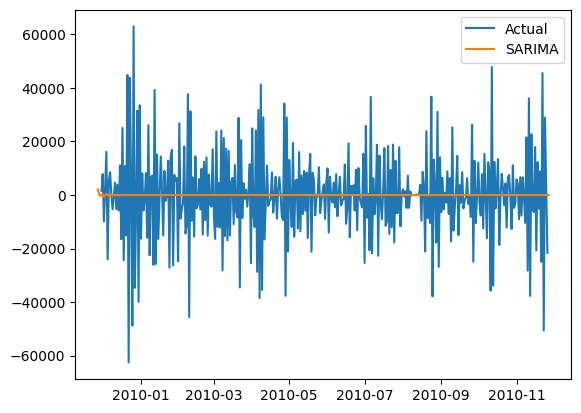

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_data, label='Actual')
plt.plot(sarima_predictions1, label='SARIMA')
plt.legend()
plt.show()

In [ ]:
test_data.shape

(364,)

Arima model

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ma_model = ARIMA(train, order=(2, 0,1))
ma_model_fit = ma_model.fit()
ma_predictions = ma_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


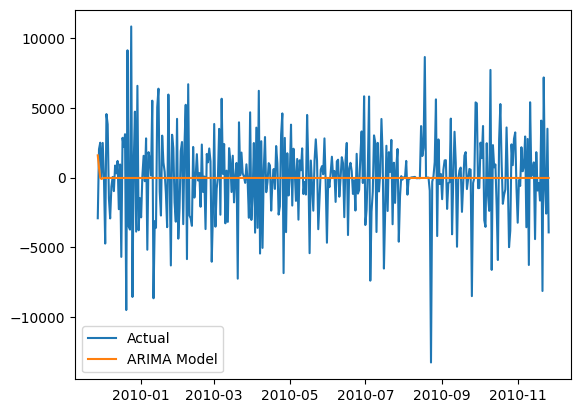

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Actual')
plt.plot(ma_predictions, label='ARIMA Model')
plt.legend()
plt.show()

LSTM python code

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True)

In [ ]:
data

,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333
...,...
2010-11-22,16924.600000
2010-11-23,16352.266667
2010-11-24,13769.466667


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.values.reshape(-1, 1))

In [ ]:
train_size = int(len(data) * 0.74)
X_train, y_train = data[:train_size], data[1:train_size+1]
X_test, y_test = data[train_size:-1], data[train_size+1:]


In [ ]:
X_test.shape

(370, 1)

In [ ]:
X_train.shape

(1055, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(1, 1)))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model5.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1055/1055 - 5s - loss: 0.0179 - 5s/epoch - 5ms/step
Epoch 2/50
1055/1055 - 2s - loss: 0.0141 - 2s/epoch - 2ms/step
Epoch 3/50
1055/1055 - 2s - loss: 0.0140 - 2s/epoch - 2ms/step
Epoch 4/50
1055/1055 - 2s - loss: 0.0139 - 2s/epoch - 2ms/step
Epoch 5/50
1055/1055 - 2s - loss: 0.0137 - 2s/epoch - 2ms/step
Epoch 6/50
1055/1055 - 2s - loss: 0.0137 - 2s/epoch - 2ms/step
Epoch 7/50
1055/1055 - 3s - loss: 0.0134 - 3s/epoch - 2ms/step
Epoch 8/50
1055/1055 - 3s - loss: 0.0135 - 3s/epoch - 3ms/step
Epoch 9/50
1055/1055 - 2s - loss: 0.0132 - 2s/epoch - 2ms/step
Epoch 10/50
1055/1055 - 2s - loss: 0.0130 - 2s/epoch - 2ms/step
Epoch 11/50
1055/1055 - 2s - loss: 0.0130 - 2s/epoch - 2ms/step
Epoch 12/50
1055/1055 - 2s - loss: 0.0128 - 2s/epoch - 2ms/step
Epoch 13/50
1055/1055 - 2s - loss: 0.0128 - 2s/epoch - 2ms/step
Epoch 14/50
1055/1055 - 3s - loss: 0.0127 - 3s/epoch - 2ms/step
Epoch 15/50
1055/1055 - 3s - loss: 0.0125 - 3s/epoch - 2ms/step
Epoch 16/50
1055/1055 - 2s - loss: 0.0125 - 2s/ep

In [ ]:
# Predict on test data
y_pred = model5.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[ 0.46321756],
       [ 0.40738207],
       [ 0.3770904 ],
       [ 0.43530786],
       [ 0.3899845 ],
       [ 0.33707637],
       [ 0.26812273],
       [ 0.31760672],
       [ 0.37066823],
       [ 0.37169063],
       [ 0.41620606],
       [ 0.4153971 ],
       [ 0.3236565 ],
       [ 0.4125812 ],
       [ 0.4672613 ],
       [ 0.44774336],
       [ 0.40215623],
       [ 0.39063722],
       [ 0.39145678],
       [ 0.37334323],
       [ 0.38963586],
       [ 0.39520812],
       [ 0.41571504],
       [ 0.37547582],
       [ 0.39306307],
       [ 0.26946574],
       [ 0.33695215],
       [ 0.3813858 ],
       [ 0.4339078 ],
       [ 0.23414871],
       [ 0.4284073 ],
       [ 0.36671847],
       [ 0.28364897],
       [ 0.4763307 ],
       [ 0.3367375 ],
       [ 0.35694247],
       [ 0.4394139 ],
       [ 0.37407607],
       [ 0.47459573],
       [ 0.42337334],
       [ 0.39876622],
       [ 0.34336257],
       [ 0.34563658],
       [ 0.37711972],
       [ 0.37217718],
       [ 0

In [ ]:
# Inverse transform to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


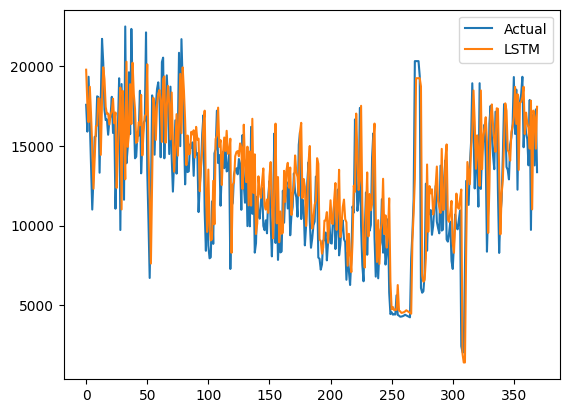

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='LSTM')
plt.legend()
plt.show()

How to check data is stationary or not

<ipython-input-128-9536f496d7cf>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


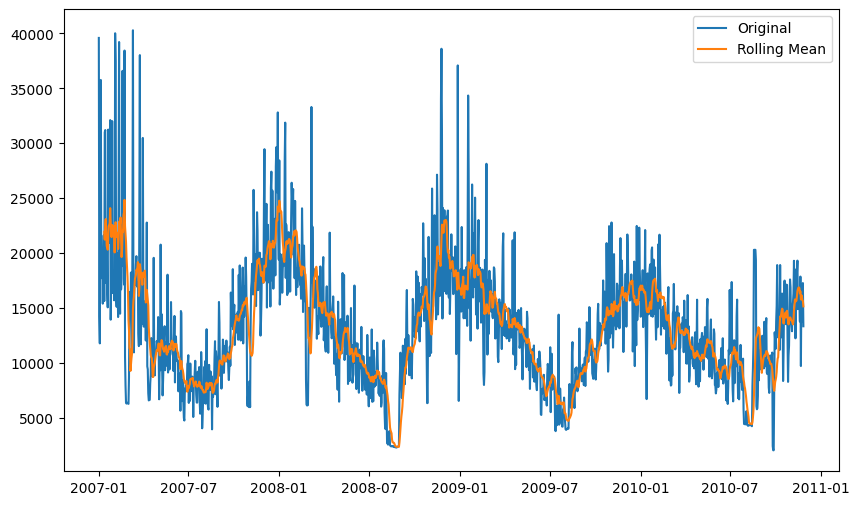

In [ ]:
import pandas as pd
fig, ax = plt.subplots(figsize=(10, 6))

# Load time series data
data = pd.read_csv('/content/power.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Compute rolling mean and variance
rolling_mean = data.rolling(window=12).mean()


# Plot rolling mean and variance
plt.plot(data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')

plt.legend()
plt.show()


Prediction for next year and each days using SARIMA model

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the time series data into a pandas DataFrame
df = pd.read_csv('power.csv', parse_dates=['Date'], index_col='Date')

# Specify the start and end dates for the prediction
start_date = '2011-1-01'
end_date = '2011-12-31'

# Fit a SARIMA model to the data
model = sm.tsa.statespace.SARIMAX(df, order=(1,1,1), seasonal_order=(0,1,1,12))
results = model.fit()

# Predict the next day using the specified start and end dates
params = results.params
prediction = results.predict(start=start_date, end=end_date, params=params)

# Print the predicted value for the next day
print(prediction[0])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


15560.852317954448


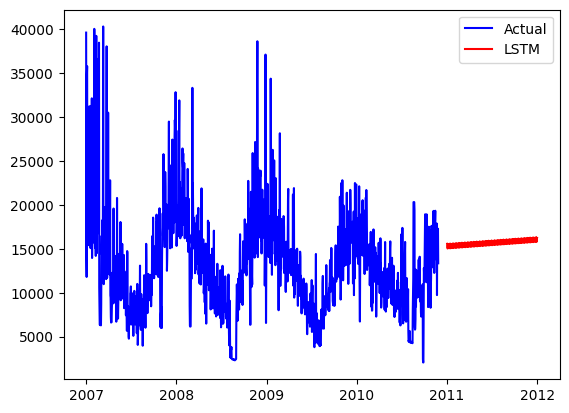

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df, label='Actual',color='Blue')
plt.plot(prediction, label='LSTM',color='red')
plt.legend()
plt.show()

predicting next year using LSTM Model